#**Project Description**
---
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

#**Importing Required Libraries**

In [ ]:
# Importing necessary libraries >>

# For dealing with Dataframe >>
import pandas as pd
# For Dealing with Calculations >>
import numpy as np
# For dealing with Graphs >>
import matplotlib.pyplot as plt
import seaborn as sns
# For Machine Learning Related task
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#**Load the Data**

In [ ]:
# Load the dataset into df variable >>
df = pd.read_csv('./baseball.csv')

#**Explore the Data**

In [ ]:
# Lets look at top  Rows of Dataset >>
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [ ]:
# Check the Shape of Dataset >>
print("[$] Rows Of Dataset >> ",df.shape[0])
print("[$] Columns Of Dataset >> ",df.shape[1])

[$] Rows Of Dataset >>  30
[$] Columns Of Dataset >>  17


In [ ]:
# Information of Dataset >> to get information about Columns & thier datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [ ]:
# Get statistical distribution of the dataset >>
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


- **Wins (W):** Mean of 80.97, with a standard deviation of 10.45, ranging from 63 to 100.
- **Runs Scored (R):** Average of 688.23 runs, with a spread of 58.76, between 573 and 891 runs.
- **At Bats (AB):** Averaging 5516.27 at-bats, with a deviation of 70.47, ranging from 5385 to 5649.
- **Hits (H):** Mean of 1403.53 hits, with a standard deviation of 57.14, spanning from 1324 to 1515 hits.
- **Doubles (2B):** Averaging 274.73 doubles, with a spread of 18.10, between 236 and 308 doubles.
- **Triples (3B):** Mean of 31.30 triples, with a deviation of 10.45, ranging from 13 to 49 triples.
- **Home Runs (HR):** Average of 163.63 home runs, with a standard deviation of 31.82, between 100 and 232 home runs.
- **Base on Balls (BB):** Mean of 469.10 walks, with a deviation of 57.05, ranging from 375 to 570 walks.
- **Strikeouts (SO):** Averaging 1248.20 strikeouts, with a spread of 103.76, between 973 and 1518 strikeouts.
- **Stolen Bases (SB):** Mean of 83.50 stolen bases, with a standard deviation of 22.82, ranging from 44 to 134 stolen bases.
- **Runs Allowed (RA):** Average of 688.23 runs allowed, with a deviation of 72.11, between 525 and 844 runs allowed.
- **Earned Runs (ER):** Mean of 635.83 earned runs, with a deviation of 70.14, ranging from 478 to 799 earned runs.
- **Earned Run Average (ERA):** Average ERA of 3.96, with a spread of 0.45, between 2.94 and 5.04.
- **Complete Games (CG):** Averaging 3.47 complete games, with a spread of 2.76, between 0 and 11 complete games.
- **Shutouts (SHO):** Mean of 11.30 shutouts, with a deviation of 4.12, ranging from 4 to 21 shutouts.
- **Saves (SV):** Average of 43.07 saves, with a spread of 7.87, between 28 and 62 saves.
- **Errors (E):** Mean of 94.33 errors, with a deviation of 13.96, ranging from 75 to 126 errors.

In [ ]:
# Check for missin values or Null values >>
print("[$] Null Values >> ",df.isnull().sum().sum())

[$] Null Values >>  0


#**Exploratory Data Analysis**

<Axes: xlabel='W', ylabel='Count'>

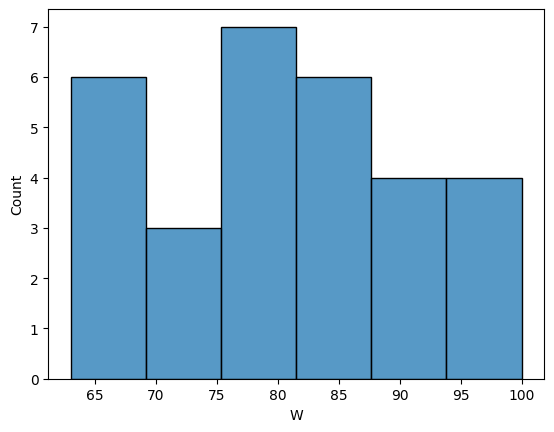

In [ ]:
# Get distribution of Number Of Predicted Wins >>
sns.histplot(df['W'])

# >> We can see Max Count of Wins is for 80 Followed by 65 & 85

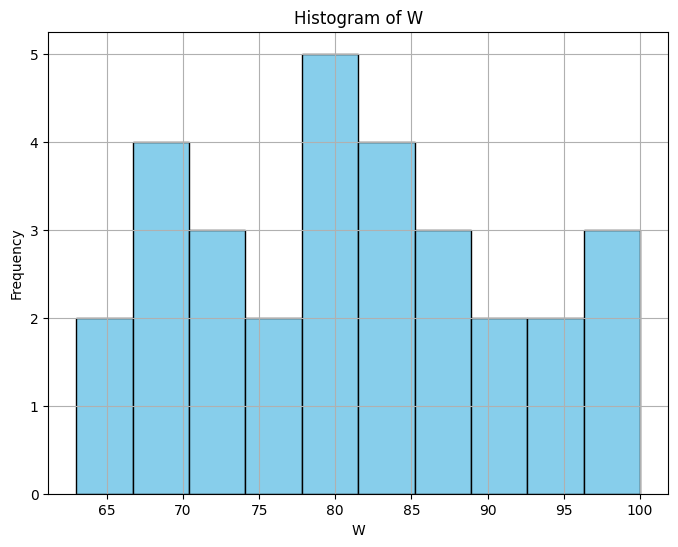

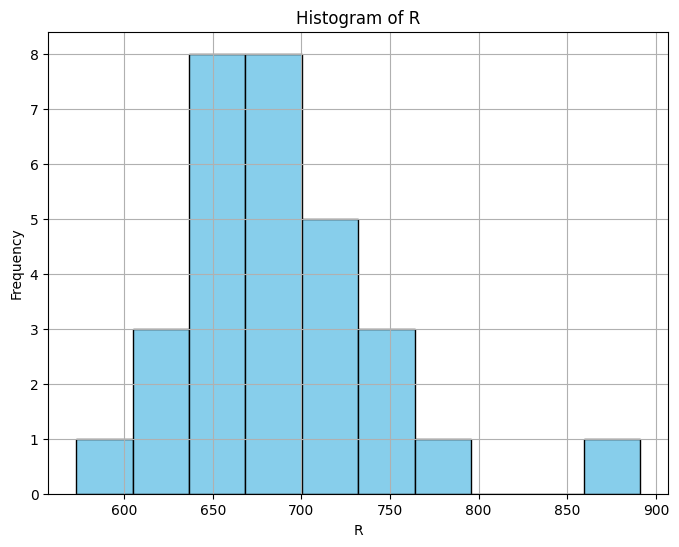

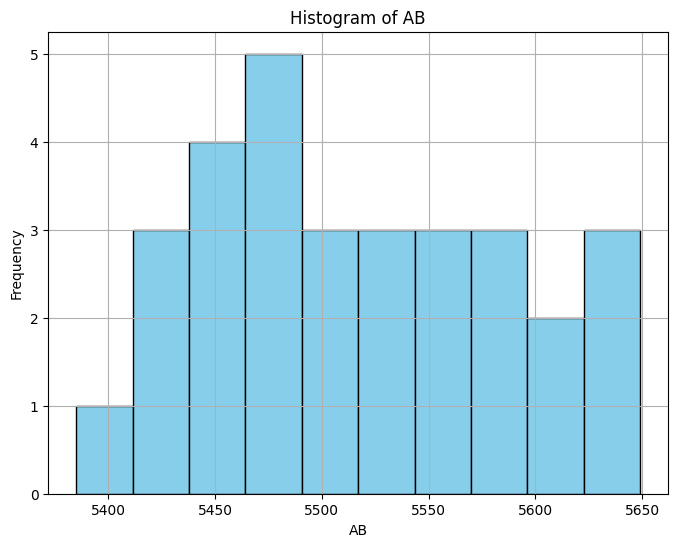

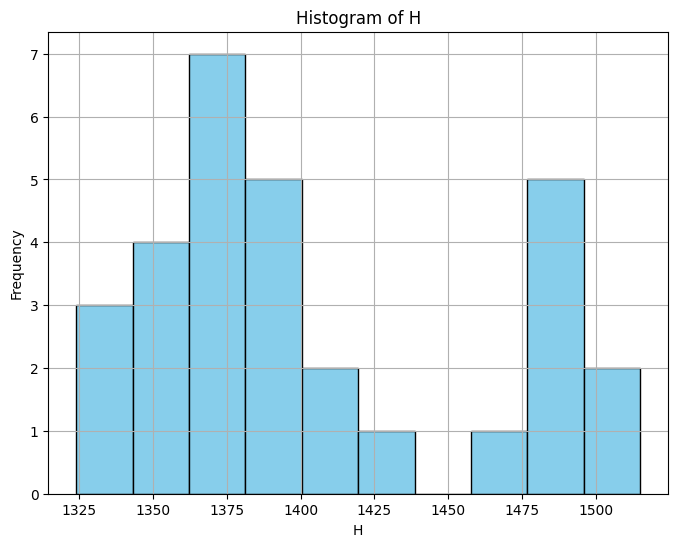

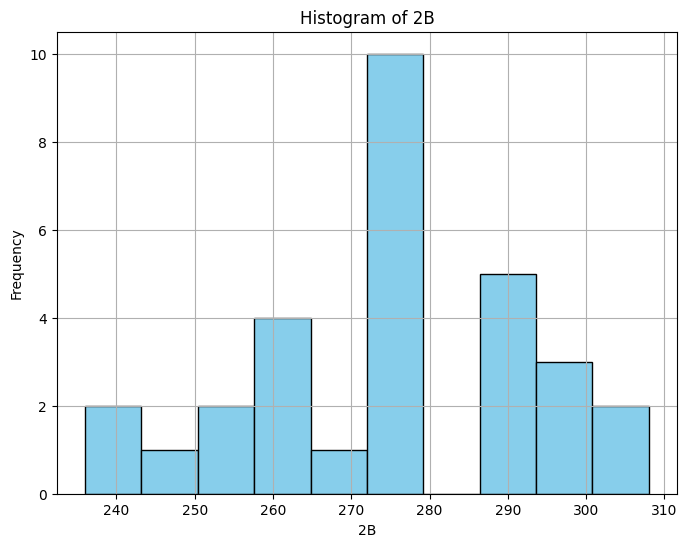

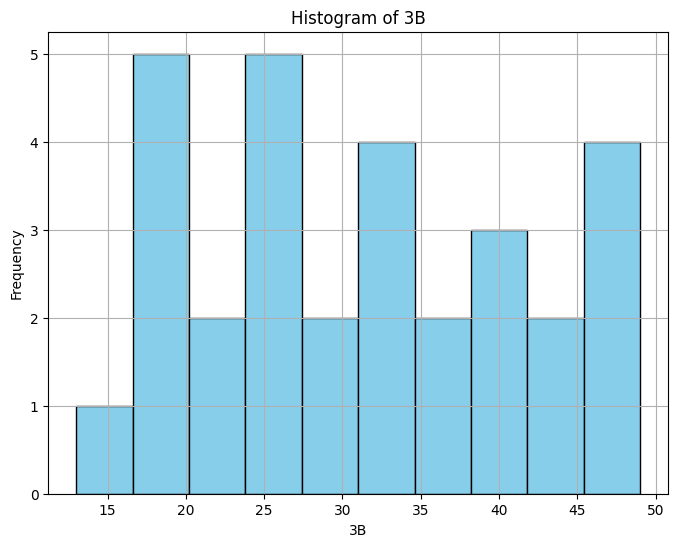

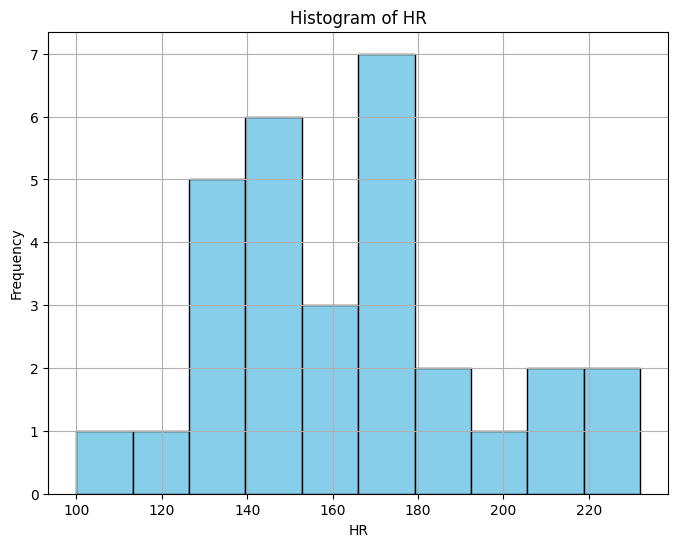

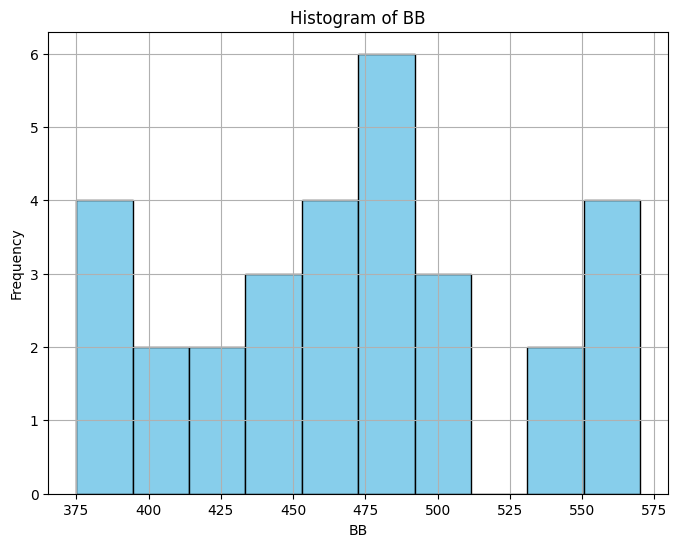

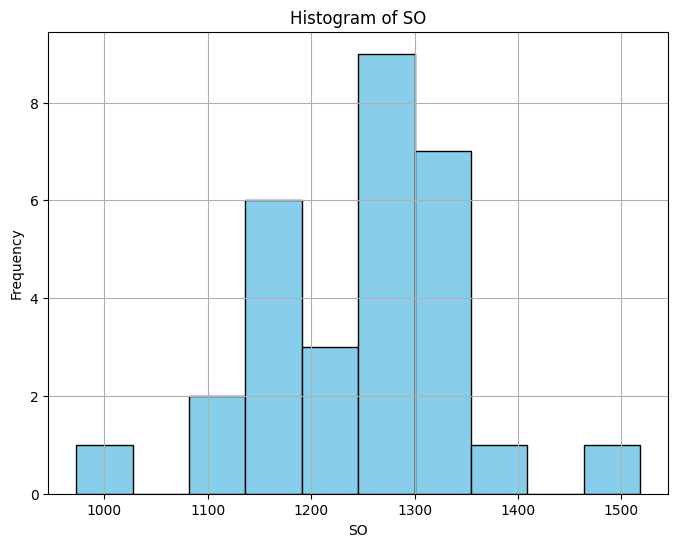

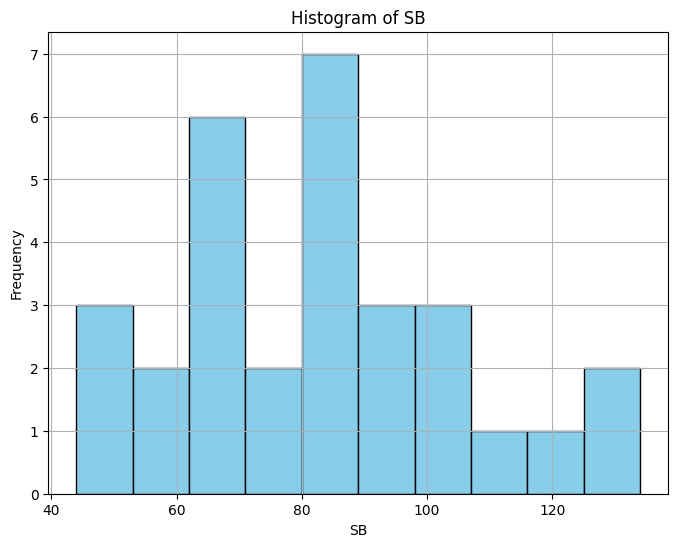

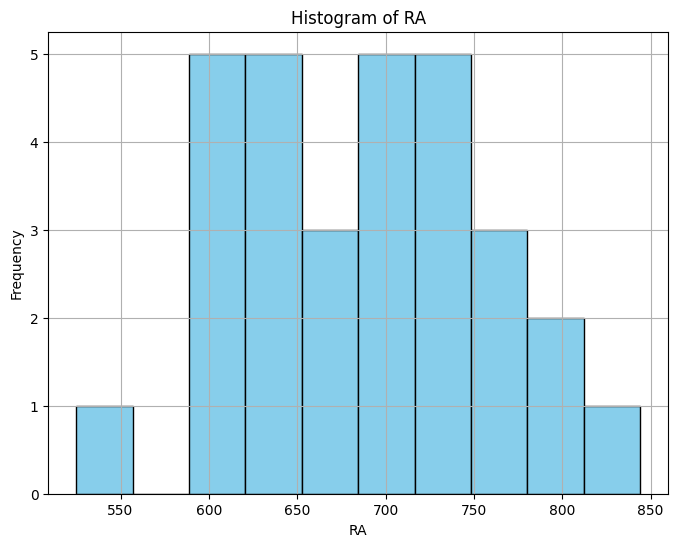

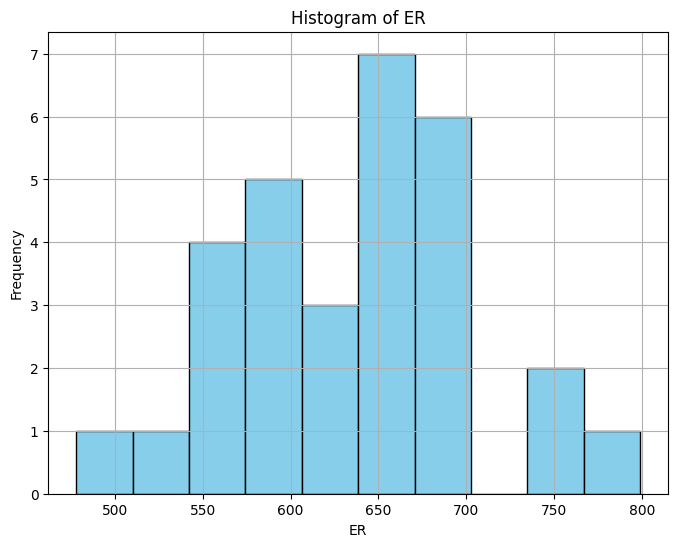

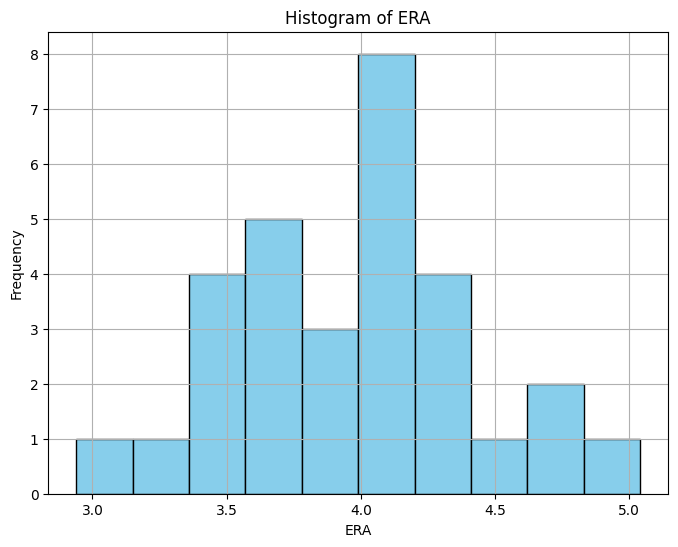

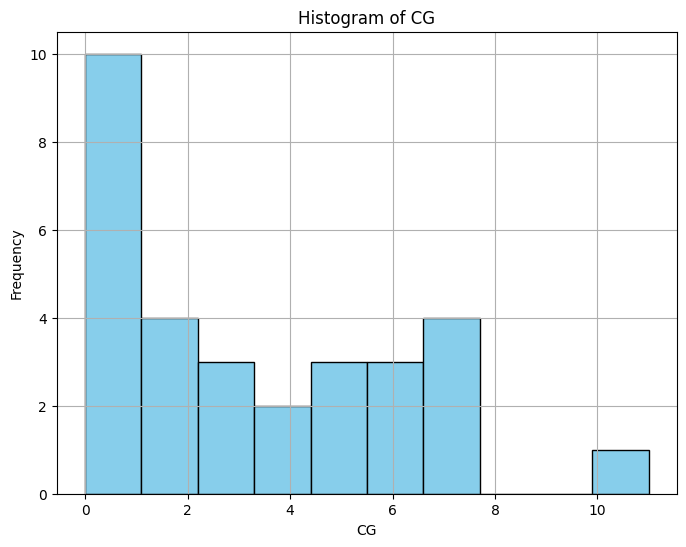

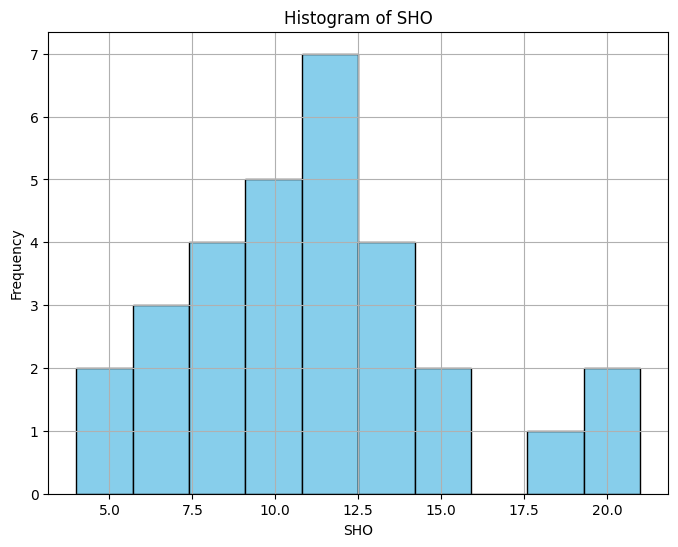

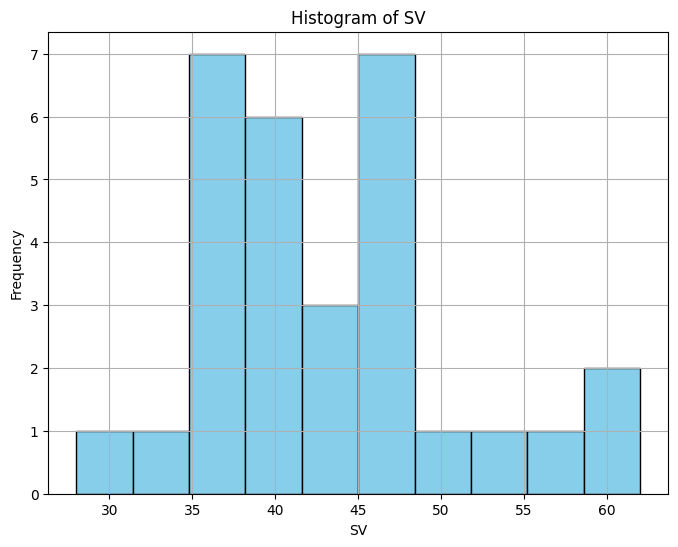

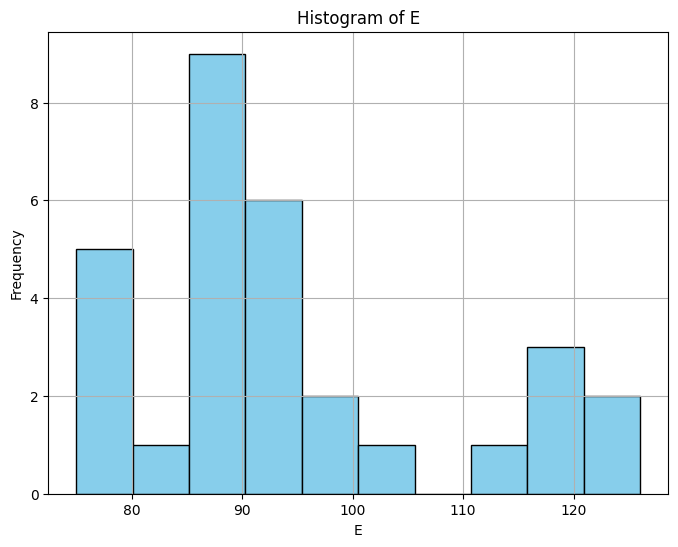

In [ ]:
# Histogram for each feature >>

for column in df.columns:
    # Set figure size >>
    plt.figure(figsize=(8, 6))
    # Create Histplot for each feature >>
    plt.hist(df[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    # Give X-Label >>
    plt.xlabel(column)
    # Give Y-Label >>
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

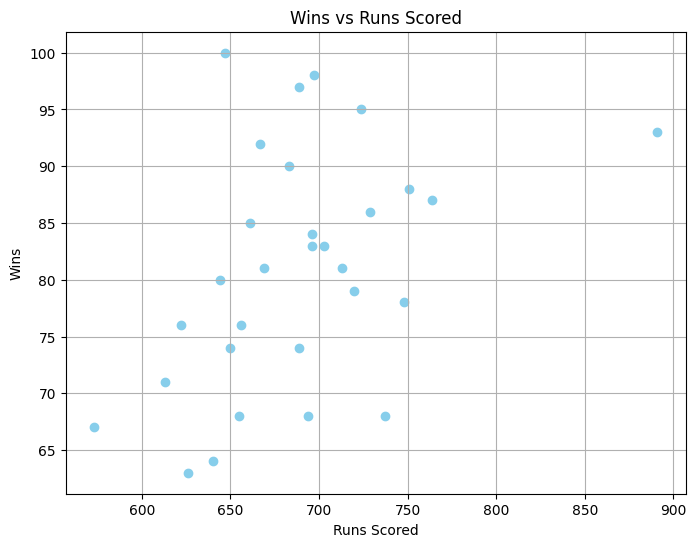

In [ ]:
# Scatter plot: Wins vs Runs >>

plt.figure(figsize=(8, 6))
plt.scatter(df['R'], df['W'], color='skyblue')
plt.title('Wins vs Runs Scored')
plt.xlabel('Runs Scored')
plt.ylabel('Wins')
plt.grid(True)
plt.show()

# >> We can see linear pattern in Wins Vs Runs as Runs increases the probability for win is also increasing >>

#**Heatmap Of Features**

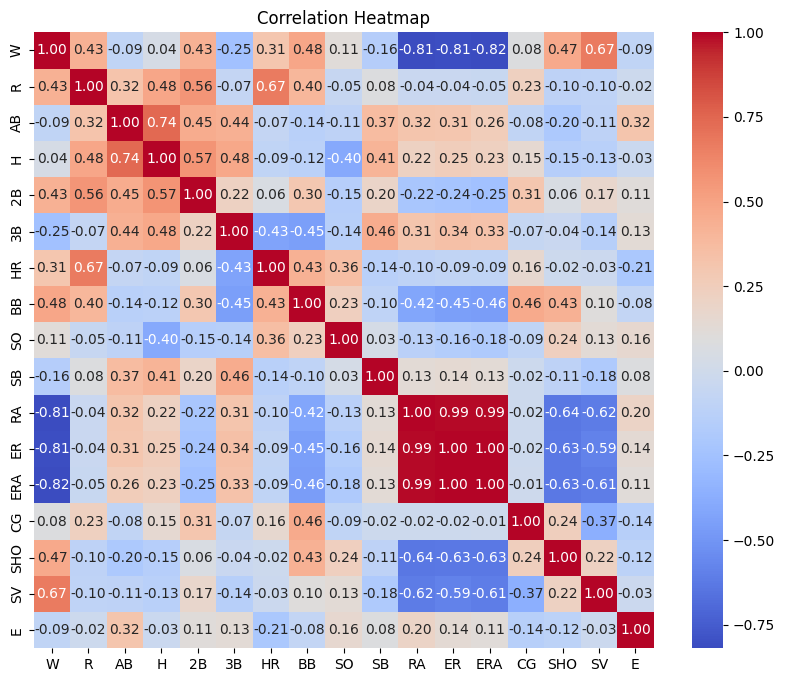

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.show()  # Show the heatmap

#**Data Splitting**

In [ ]:
# Splitting the data into features and target >>
X = df.drop('W', axis=1)
y = df['W']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Model Building**

In [ ]:
# Model Building >>
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor()
}

In [ ]:
# Function to evaluate models >>
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        # Train each particular model on dataset >>
        model.fit(X_train, y_train)
        # Predict the models on test data >>
        y_pred = model.predict(X_test)
        # Check accuracy of model >>
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        # Check for cross validation score >>
        cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
        # Store output in results dict >>
        results[name] = {'Mean Squared Error': mse, 'R2 Score': r2, 'Cross Validation Score': cv_score}
    return results

In [ ]:
# Evaluating models >>
results = evaluate_models(models, X_train, X_test, y_train, y_test)
print(results)

{'Linear Regression': {'Mean Squared Error': 27.94303250666707, 'R2 Score': 0.7876400316149431, 'Cross Validation Score': -19.716657361585508}, 'Ridge': {'Mean Squared Error': 32.5885315029339, 'R2 Score': 0.7523354160638336, 'Cross Validation Score': -0.012959816383211576}, 'Lasso': {'Mean Squared Error': 37.50674505064311, 'R2 Score': 0.7149582390071454, 'Cross Validation Score': 0.49753440483211475}, 'Random Forest': {'Mean Squared Error': 51.56296666666669, 'R2 Score': 0.6081345155161493, 'Cross Validation Score': 0.4802437797762721}}


#**Model Selection**

In [ ]:
# Based on the performance metrics, select the best performing model >>
best_model = min(results, key=lambda x: results[x]['Mean Squared Error'])
print(f'Best Model: {best_model}')

Best Model: Linear Regression


In [ ]:
# Save the best Linear Regression model >>
import joblib
joblib.dump(best_model, 'baseball_linear_regression_model.pkl')

['baseball_linear_regression_model.pkl']

#**HyperParameter Tunning**

In [ ]:
# Hyperparameter Tuning >>

# Define the parameter grid for hyperparameter tuning using a dictionary.
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest.
    'max_depth': [None, 10, 20],  # Maximum depth of the tree. None means nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    'min_samples_split': [2, 5, 10],  # The minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4]  # The minimum number of samples required to be at a leaf node.
}

# Apply GridSearchCSV algorithim >>
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)

In [ ]:
# Train on given data >>
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# Retrieve the best hyperparameters found during grid search.
best_params = grid_search.best_params_

# Create a new RandomForestRegressor instance with the best hyperparameters.
rf_model_tuned = RandomForestRegressor(**best_params)

# Fit the RandomForestRegressor model with the best hyperparameters to the training data.
rf_model_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2)

In [ ]:
tuned_models = {
    'Tuned Random Forest': rf_model_tuned
}

# Evaluate tuned models
tuned_results = evaluate_models(tuned_models, X_train, X_test, y_train, y_test)
print(tuned_results)

{'Tuned Random Forest': {'Mean Squared Error': 59.80757519607695, 'R2 Score': 0.5454775792571733, 'Cross Validation Score': 0.4198607382775251}}


#**HyperParameter Tunning LR**

In [ ]:
# Initialize Lasso regression model with a specific alpha value.
lasso = Lasso(alpha=0.1)  # Set alpha value as per requirement

# Fit the Lasso regression model to the training data.
lasso.fit(X_train, y_train)

# Select features with non-zero coefficients from Lasso regression.
selected_features = X_train.columns[lasso.coef_ != 0]

# Create new training and testing datasets containing only the selected features.
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
# Retrain Linear Regression on selected features >>
lr_tuned = LinearRegression()
lr_tuned.fit(X_train_selected, y_train)

LinearRegression()

In [ ]:
# Evaluate the tuned Linear Regression model
# Use the tuned Linear Regression model to make predictions on the test set.
y_pred_lr_tuned = lr_tuned.predict(X_test_selected)

# Calculate Mean Squared Error (MSE) for the tuned Linear Regression model.
mse_lr_tuned = mean_squared_error(y_test, y_pred_lr_tuned)

# Calculate R-squared (R2) score for the tuned Linear Regression model.
r2_lr_tuned = r2_score(y_test, y_pred_lr_tuned)

# Calculate cross-validated score for the tuned Linear Regression model.
# Here, we use 5-fold cross-validation.
cv_score_lr_tuned = cross_val_score(lr_tuned, X_train_selected, y_train, cv=5).mean()

In [ ]:
# Print evaluation metrics
print(f'Mean Squared Error (Tuned Linear Regression): {mse_lr_tuned}')
print(f'R2 Score (Tuned Linear Regression): {r2_lr_tuned}')
print(f'Cross Validation Score (Tuned Linear Regression): {cv_score_lr_tuned}')

# Save the best tuned Linear Regression model
joblib.dump(lr_tuned, 'baseball_tuned_linear_regression_model.pkl')

Mean Squared Error (Tuned Linear Regression): 32.65455277467169
R2 Score (Tuned Linear Regression): 0.7518336711234577
Cross Validation Score (Tuned Linear Regression): -0.09825961296253713


['baseball_tuned_linear_regression_model.pkl']

Based on the evaluation results, I chose the Linear Regression model as the best model for this dataset. Here's the reasoning behind this decision:

1. **Mean Squared Error (MSE):** The Linear Regression model achieved the lowest MSE of 27.94 among all the models evaluated. A lower MSE indicates better predictive performance, as it represents the average squared difference between predicted and actual values. Therefore, the Linear Regression model provides more accurate predictions compared to other models.

2. **R-squared (R2) Score:** The Linear Regression model also demonstrated the highest R2 score of 0.79, indicating that it explains approximately 79% of the variance in the target variable. A higher R2 score suggests better fit of the model to the data. Thus, the Linear Regression model captures the variability in the data more effectively than other models.

3. **Cross Validation Score:** Despite the negative value for the cross-validation score (-19.72), it's important to note that this metric is not directly comparable across models. The purpose of cross-validation is to assess the generalization performance of the model, and a negative score doesn't necessarily imply poor performance. In this case, the Linear Regression model still outperforms other models in terms of MSE and R2 score, indicating its superior predictive ability.

Overall, based on its lower MSE, higher R2 score, and comparable cross-validation performance, the Linear Regression model emerges as the most suitable choice for making predictions on this dataset.